# Домашнее задание к лекции 4.3 «Работа с данными»

Используя kmeans сделать кластеризацию футбольных команд по кол-ву пропущеных мячей и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров.

In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Импортируем функции из библиотеки для кластеризации и векторного квантования.

In [2]:
from scipy.cluster.vq import whiten, kmeans2

Для удобства зададим вспомогательный метод для обращения к API.

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

Будем анализировать турнирную таблицу Итальянской Серии А сезон 2016-2017

In [4]:
standings = call_api('http://api.football-data.org/v1/competitions/438/leagueTable', 'standing')
standings

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/109'}},
  'away': {'draws': 3,
   'goals': 29,
   'goalsAgainst': 18,
   'losses': 5,
   'wins': 11},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/d/d2/Juventus_Turin.svg',
  'draws': 4,
  'goalDifference': 50,
  'goals': 77,
  'goalsAgainst': 27,
  'home': {'draws': 1,
   'goals': 48,
   'goalsAgainst': 9,
   'losses': 0,
   'wins': 18},
  'losses': 5,
  'playedGames': 38,
  'points': 91,
  'position': 1,
  'teamName': 'Juventus Turin',
  'wins': 29},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/100'}},
  'away': {'draws': 2,
   'goals': 40,
   'goalsAgainst': 20,
   'losses': 5,
   'wins': 12},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/3/32/AS_Rom.svg',
  'draws': 3,
  'goalDifference': 52,
  'goals': 90,
  'goalsAgainst': 38,
  'home': {'draws': 1,
   'goals': 50,
   'goalsAgainst': 18,
   'losses': 2,
   'wins': 16},
  'losses': 7,
  'playedGames': 38,
  'points': 8

Для каждой команды получаем кол-во пропущенных мячей и проигрышей за сезон

In [5]:
for team in standings:
    print('Team "{}", {} losses, {} goals_against'.format(team['teamName'], team['losses'], team['goalsAgainst']))

Team "Juventus Turin", 5 losses, 27 goals_against
Team "AS Roma", 7 losses, 38 goals_against
Team "SSC Napoli", 4 losses, 39 goals_against
Team "Atalanta BC", 8 losses, 41 goals_against
Team "SS Lazio", 10 losses, 51 goals_against
Team "AC Milan", 11 losses, 45 goals_against
Team "FC Internazionale Milano", 14 losses, 49 goals_against
Team "ACF Fiorentina", 10 losses, 57 goals_against
Team "Torino FC", 11 losses, 66 goals_against
Team "UC Sampdoria", 14 losses, 55 goals_against
Team "Cagliari Calcio", 19 losses, 76 goals_against
Team "US Sassuolo Calcio", 18 losses, 63 goals_against
Team "Udinese Calcio", 17 losses, 56 goals_against
Team "AC Chievo Verona", 19 losses, 61 goals_against
Team "Bologna FC", 19 losses, 58 goals_against
Team "Genoa CFC", 20 losses, 64 goals_against
Team "FC Crotone", 22 losses, 58 goals_against
Team "Empoli FC", 22 losses, 61 goals_against
Team "US Cittá di Palermo", 24 losses, 77 goals_against
Team "Pescara Calcio", 26 losses, 81 goals_against


Готовим данные для трансформации в Pandas

In [6]:
team_for_pd = []
for team in standings:
    team_for_pd.append({'name': team['teamName'], 'losses': team['losses'], 'goals_against': team['goalsAgainst']})
team_for_pd

[{'goals_against': 27, 'losses': 5, 'name': 'Juventus Turin'},
 {'goals_against': 38, 'losses': 7, 'name': 'AS Roma'},
 {'goals_against': 39, 'losses': 4, 'name': 'SSC Napoli'},
 {'goals_against': 41, 'losses': 8, 'name': 'Atalanta BC'},
 {'goals_against': 51, 'losses': 10, 'name': 'SS Lazio'},
 {'goals_against': 45, 'losses': 11, 'name': 'AC Milan'},
 {'goals_against': 49, 'losses': 14, 'name': 'FC Internazionale Milano'},
 {'goals_against': 57, 'losses': 10, 'name': 'ACF Fiorentina'},
 {'goals_against': 66, 'losses': 11, 'name': 'Torino FC'},
 {'goals_against': 55, 'losses': 14, 'name': 'UC Sampdoria'},
 {'goals_against': 76, 'losses': 19, 'name': 'Cagliari Calcio'},
 {'goals_against': 63, 'losses': 18, 'name': 'US Sassuolo Calcio'},
 {'goals_against': 56, 'losses': 17, 'name': 'Udinese Calcio'},
 {'goals_against': 61, 'losses': 19, 'name': 'AC Chievo Verona'},
 {'goals_against': 58, 'losses': 19, 'name': 'Bologna FC'},
 {'goals_against': 64, 'losses': 20, 'name': 'Genoa CFC'},
 {'go

Трансформируем

In [7]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals_against,losses,name
0,27,5,Juventus Turin
1,38,7,AS Roma
2,39,4,SSC Napoli
3,41,8,Atalanta BC
4,51,10,SS Lazio
5,45,11,AC Milan
6,49,14,FC Internazionale Milano
7,57,10,ACF Fiorentina
8,66,11,Torino FC
9,55,14,UC Sampdoria


Отображаем

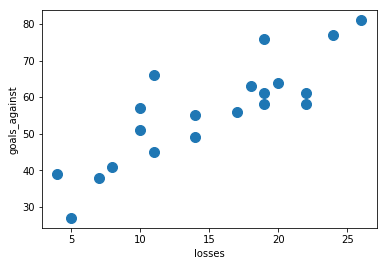

In [8]:
teams_pd.plot.scatter(x='losses', y='goals_against', s=100)

Удаляем колонку с именами

In [9]:
del teams_pd['name']
teams_pd

,goals_against,losses
0,27,5
1,38,7
2,39,4
3,41,8
4,51,10
5,45,11
6,49,14
7,57,10
8,66,11
9,55,14


Нормализация данных

In [10]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.00896249,  0.78860037],
       [ 2.82742869,  1.10404052],
       [ 2.90183471,  0.6308803 ],
       [ 3.05064675,  1.2617606 ],
       [ 3.79470693,  1.57720074],
       [ 3.34827082,  1.73492082],
       [ 3.64589489,  2.20808104],
       [ 4.24114304,  1.57720074],
       [ 4.91079721,  1.73492082],
       [ 4.092331  ,  2.20808104],
       [ 5.65485739,  2.99668141],
       [ 4.68757915,  2.83896134],
       [ 4.16673702,  2.68124127],
       [ 4.53876711,  2.99668141],
       [ 4.31554906,  2.99668141],
       [ 4.76198517,  3.15440149],
       [ 4.31554906,  3.46984164],
       [ 4.53876711,  3.46984164],
       [ 5.72926341,  3.78528179],
       [ 6.02688748,  4.10072194]])

Сделаем 3 кластера

In [11]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 4.32484981,  2.40523114],
        [ 2.98864173,  1.18290056],
        [ 5.17121827,  3.49612832]]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2]))

Зададим цвета для каждого кластера

In [12]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b']

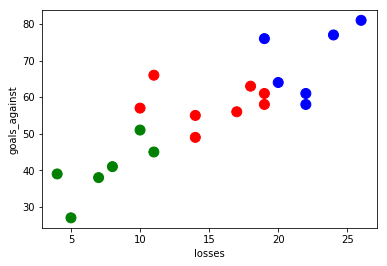

In [13]:
teams_pd.plot.scatter(x='losses', y='goals_against', c=colors, s=100)

Теперь сделаем 5 кластеров.

In [15]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\Users\IvanovKS\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 4.47499053,  3.08680717],
        [ 2.93903772,  1.18290056],
        [ 5.80366942,  3.62756171],
        [ 2.4553986 ,  0.70974034],
        [ 4.00552398,  1.84006754]]),
 array([3, 1, 3, 1, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2]))

In [16]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'g',
 'y',
 'g',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b']

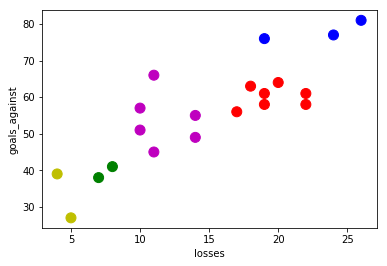

In [17]:
teams_pd.plot.scatter(x='losses', y='goals_against', c=colors, s=100)